# 🔬 Exploratory Data Analysis: Complete Framework

<img src='https://media.licdn.com/dms/image/v2/D4D12AQEPW9uPkE-jjw/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1703364386900?e=2147483647&v=beta&t=Y5VR_BlRlV-cQxDg22-yM5qRfPxbdZ42R6YF9eK0ZP0' width='600' alt='EDA'>

## 🎯 The Art of Understanding Data

**EDA is detective work!** This notebook teaches you:
- **Systematic exploration** frameworks
- **Visual storytelling** with data
- **Pattern recognition** techniques
- **Hypothesis generation** from data
- **Business insights** extraction

### 📚 What We'll Master Today:
1. **EDA Framework** - Systematic approach
2. **Univariate Analysis** - One variable at a time
3. **Bivariate Analysis** - Relationships between two
4. **Multivariate Analysis** - Complex patterns
5. **Time Series EDA** - Temporal patterns
6. **Text Data EDA** - Unstructured data
7. **Automated EDA** - Tools and libraries
8. **Business Insights** - Actionable findings
9. **Report Generation** - Professional outputs
10. **Complete Case Study** - Real-world project

---

## 🚀 Let's Explore Data Like Pros!

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("🔬 Exploratory Data Analysis - Ready to Explore!")
print("\n💡 Remember: EDA is about asking questions and finding answers in data!")

c:\Users\RC\miniconda3\envs\ML_Python\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


🔬 Exploratory Data Analysis - Ready to Explore!

💡 Remember: EDA is about asking questions and finding answers in data!


---

## 📌 Section 1: EDA Framework

### 🎯 Systematic Approach to Data Exploration

In [2]:
# 1.1 Load and Prepare Dataset
print("📊 LOADING E-COMMERCE DATASET\n" + "="*40)

# Create a comprehensive e-commerce dataset
np.random.seed(42)
n_customers = 5000
n_products = 100

# Generate customer data
customers = pd.DataFrame({
    'customer_id': range(1, n_customers + 1),
    'age': np.random.normal(35, 12, n_customers).clip(18, 80).astype(int),
    'gender': np.random.choice(['M', 'F'], n_customers),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], n_customers, p=[0.3, 0.25, 0.2, 0.15, 0.1]),
    'membership_level': np.random.choice(['Bronze', 'Silver', 'Gold', 'Platinum'], n_customers, p=[0.4, 0.3, 0.2, 0.1]),
    'account_age_days': np.random.exponential(365, n_customers),
    'total_spent': np.random.lognormal(6, 1.5, n_customers),
    'num_purchases': np.random.poisson(10, n_customers),
    'avg_rating': np.random.normal(4, 0.5, n_customers).clip(1, 5),
    'is_subscribed': np.random.choice([0, 1], n_customers, p=[0.6, 0.4]),
    'preferred_category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Sports', 'Books'], n_customers),
    'last_purchase_days_ago': np.random.exponential(30, n_customers),
    'customer_lifetime_value': np.random.lognormal(7, 1, n_customers)
})

# Add some correlations
customers['total_spent'] = customers['total_spent'] * (1 + customers['num_purchases'] * 0.1)
customers.loc[customers['membership_level'] == 'Platinum', 'total_spent'] *= 2
customers['churn_risk'] = (customers['last_purchase_days_ago'] > 60).astype(int)

print("Dataset Overview:")
print(f"Shape: {customers.shape}")
print(f"\nFirst 5 rows:")
print(customers.head())
print(f"\nData Types:")
print(customers.dtypes)
print(f"\nBasic Statistics :")
print(customers.describe())

📊 LOADING E-COMMERCE DATASET
Dataset Overview:
Shape: (5000, 14)

First 5 rows:
   customer_id  age gender         city membership_level  account_age_days  \
0            1   40      F  Los Angeles         Platinum         14.963838   
1            2   33      M      Chicago             Gold        184.943222   
2            3   42      F      Phoenix           Silver       1077.760658   
3            4   53      F     New York             Gold        104.833708   
4            5   32      F      Chicago           Bronze       1036.362132   

   total_spent  num_purchases  avg_rating  is_subscribed preferred_category  \
0  6391.150914              5    3.534698              0              Books   
1   168.028891             13    4.339826              0           Clothing   
2   508.818668             10    3.677179              0             Sports   
3  5735.156099             12    4.502478              1             Sports   
4  1319.702693             10    4.491294              0

       customer_id         age  account_age_days    total_spent  \
count  5000.000000  5000.00000       5000.000000    5000.000000   
mean   2500.500000    35.03460        380.784083    2650.541550   
std    1443.520003    11.08821        381.617748    7607.536796   
min       1.000000    18.00000          0.017566       2.728888   
25%    1250.750000    27.00000        110.903953     302.560685   
50%    2500.500000    35.00000        261.534645     826.017259   
75%    3750.250000    42.00000        521.621845    2336.357635   
max    5000.000000    80.00000       3365.357854  283608.601362   

       num_purchases   avg_rating  is_subscribed  last_purchase_days_ago  \
count    5000.000000  5000.000000    5000.000000             5000.000000   
mean        9.969000     3.981845       0.405400               29.935315   
std         3.147129     0.484707       0.491018               29.832160   
min         0.000000     2.373985       0.000000                0.008105   
25%         8.00

In [3]:
# 1.2 EDA Framework Implementation
print("🎯 SYSTEMATIC EDA FRAMEWORK\n" + "="*40)

class EDAFramework:
    def __init__(self, df):
        self.df = df
        self.numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        self.categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    def basic_info(self):
        print("📊 BASIC INFORMATION")
        print("=" * 50)
        print(f"Rows: {len(self.df):,}")
        print(f"Columns: {len(self.df.columns)}")
        print(f"Numeric: {len(self.numeric_cols)}")
        print(f"Categorical: {len(self.categorical_cols)}")
        print(f"Memory Usage: {self.df.memory_usage().sum() / 1024**2:.2f} MB")
        print(f"\nMissing Values: {self.df.isnull().sum().sum()}")
        print(f"Duplicate Rows: {self.df.duplicated().sum()}")
    
    def distribution_analysis(self):
        print("\n📈 DISTRIBUTION ANALYSIS")
        print("=" * 50)
        
        for col in self.numeric_cols[:5]:  # First 5 numeric columns
            skew = self.df[col].skew()
            kurt = self.df[col].kurtosis()
            print(f"\n{col}:")
            print(f"  Mean: {self.df[col].mean():.2f}")
            print(f"  Median: {self.df[col].median():.2f}")
            print(f"  Std: {self.df[col].std():.2f}")
            print(f"  Skewness: {skew:.2f} ({'Right' if skew > 0 else 'Left'} skewed)")
            print(f"  Kurtosis: {kurt:.2f} ({'Heavy' if kurt > 0 else 'Light'} tailed)")
    
    def correlation_analysis(self):
        print("\n🔗 TOP CORRELATIONS")
        print("=" * 50)
        
        corr_matrix = self.df[self.numeric_cols].corr()
        
        # Get top correlations
        corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))
        
        corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
        
        for var1, var2, corr in corr_pairs[:5]:
            print(f"{var1} ↔ {var2}: {corr:.3f}")
    
    def category_analysis(self):
        print("\n📊 CATEGORICAL ANALYSIS")
        print("=" * 50)
        
        for col in self.categorical_cols:
            print(f"\n{col}:")
            value_counts = self.df[col].value_counts()
            print(f"  Unique Values: {self.df[col].nunique()}")
            print(f"  Most Common: {value_counts.index[0]} ({value_counts.iloc[0]:,} occurrences)")
            print(f"  Distribution:")
            for val, count in value_counts.head(3).items():
                print(f"    {val}: {count/len(self.df)*100:.1f}%")

# Run EDA Framework
eda = EDAFramework(customers)
eda.basic_info()
eda.distribution_analysis()
eda.correlation_analysis()
eda.category_analysis()

🎯 SYSTEMATIC EDA FRAMEWORK
📊 BASIC INFORMATION
Rows: 5,000
Columns: 14
Numeric: 10
Categorical: 4
Memory Usage: 0.46 MB

Missing Values: 0
Duplicate Rows: 0

📈 DISTRIBUTION ANALYSIS

customer_id:
  Mean: 2500.50
  Median: 2500.50
  Std: 1443.52
  Skewness: 0.00 (Left skewed)
  Kurtosis: -1.20 (Light tailed)

age:
  Mean: 35.03
  Median: 35.00
  Std: 11.09
  Skewness: 0.34 (Right skewed)
  Kurtosis: -0.34 (Light tailed)

account_age_days:
  Mean: 380.78
  Median: 261.53
  Std: 381.62
  Skewness: 1.99 (Right skewed)
  Kurtosis: 5.65 (Heavy tailed)

total_spent:
  Mean: 2650.54
  Median: 826.02
  Std: 7607.54
  Skewness: 17.44 (Right skewed)
  Kurtosis: 501.48 (Heavy tailed)

num_purchases:
  Mean: 9.97
  Median: 10.00
  Std: 3.15
  Skewness: 0.31 (Right skewed)
  Kurtosis: 0.06 (Heavy tailed)

🔗 TOP CORRELATIONS
last_purchase_days_ago ↔ churn_risk: 0.794
total_spent ↔ num_purchases: 0.063
age ↔ num_purchases: -0.046
age ↔ customer_lifetime_value: -0.032
total_spent ↔ is_subscribed: -0.02

---

## 📌 Section 2: Univariate Analysis

### 🎯 Deep Dive into Individual Variables

📊 UNIVARIATE ANALYSIS


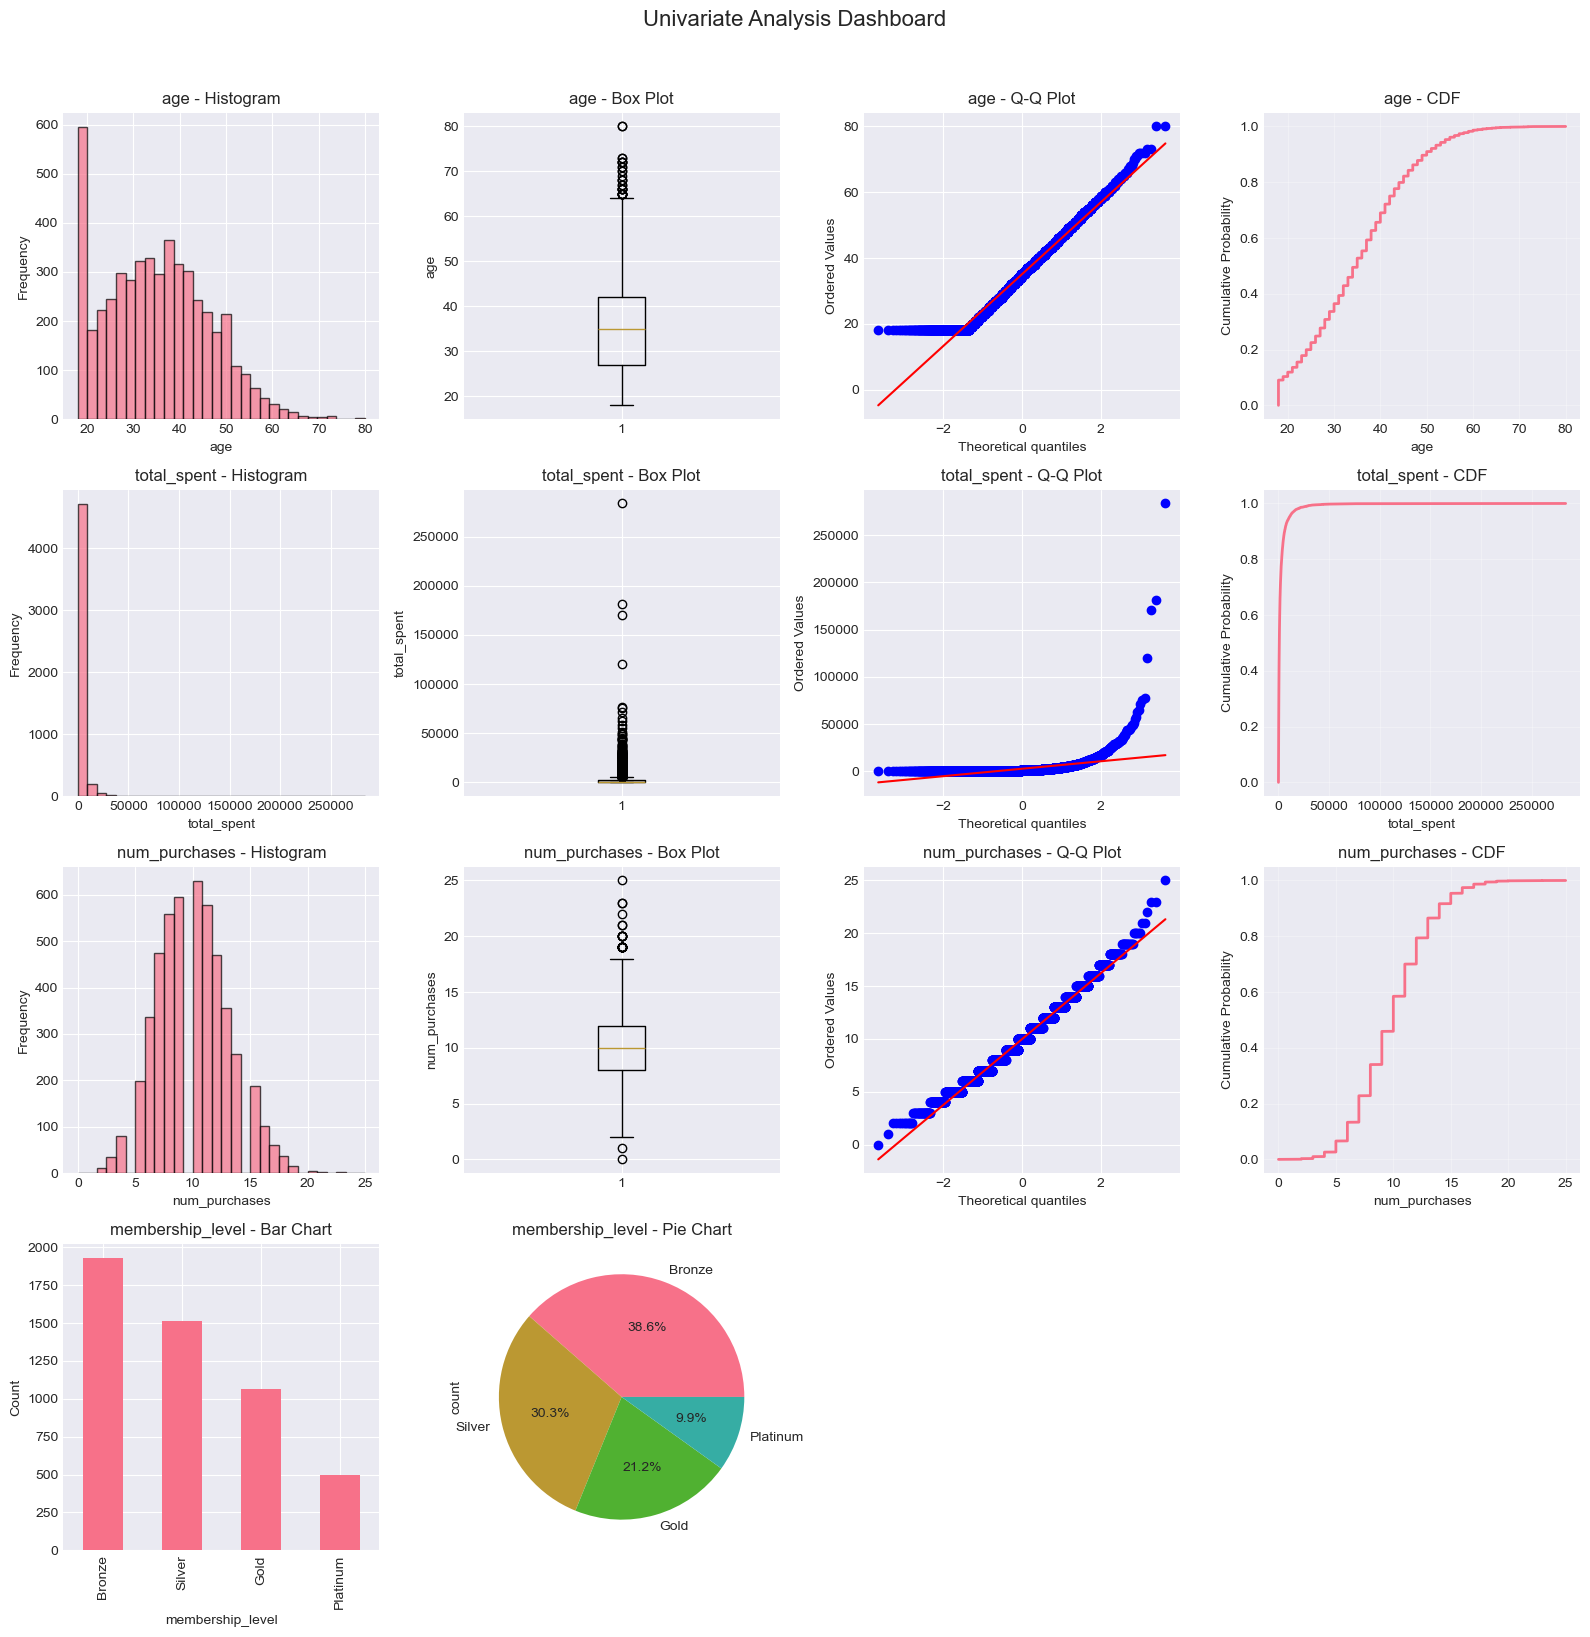


📊 Normality Tests:
age: Shapiro-Wilk p-value = 0.0000 (Not Normal)
total_spent: Shapiro-Wilk p-value = 0.0000 (Not Normal)
num_purchases: Shapiro-Wilk p-value = 0.0000 (Not Normal)


In [4]:
# 2.1 Comprehensive Univariate Analysis
print("📊 UNIVARIATE ANALYSIS\n" + "="*40)

# Select key variables for analysis
univariate_vars = ['age', 'total_spent', 'num_purchases', 'membership_level']

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for idx, var in enumerate(univariate_vars):
    row = idx
    
    if var in customers.select_dtypes(include=[np.number]).columns:
        # Histogram
        ax = axes[row, 0]
        ax.hist(customers[var], bins=30, edgecolor='black', alpha=0.7)
        ax.set_title(f'{var} - Histogram')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')
        
        # Box plot
        ax = axes[row, 1]
        ax.boxplot(customers[var].dropna())
        ax.set_title(f'{var} - Box Plot')
        ax.set_ylabel(var)
        
        # Q-Q plot
        ax = axes[row, 2]
        stats.probplot(customers[var].dropna(), dist="norm", plot=ax)
        ax.set_title(f'{var} - Q-Q Plot')
        
        # CDF
        ax = axes[row, 3]
        sorted_data = np.sort(customers[var].dropna())
        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        ax.plot(sorted_data, cdf, linewidth=2)
        ax.set_title(f'{var} - CDF')
        ax.set_xlabel(var)
        ax.set_ylabel('Cumulative Probability')
        ax.grid(True, alpha=0.3)
        
    else:  # Categorical variable
        # Bar chart
        ax = axes[row, 0]
        customers[var].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'{var} - Bar Chart')
        ax.set_xlabel(var)
        ax.set_ylabel('Count')
        
        # Pie chart
        ax = axes[row, 1]
        customers[var].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%')
        ax.set_title(f'{var} - Pie Chart')
        
        # Hide unused subplots for categorical
        axes[row, 2].axis('off')
        axes[row, 3].axis('off')

plt.suptitle('Univariate Analysis Dashboard', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Statistical tests for normality
print("\n📊 Normality Tests:")
for col in ['age', 'total_spent', 'num_purchases']:
    stat, p_value = stats.shapiro(customers[col].dropna().sample(min(5000, len(customers))))
    print(f"{col}: Shapiro-Wilk p-value = {p_value:.4f} ({'Normal' if p_value > 0.05 else 'Not Normal'})")

---

## 📌 Section 3: Bivariate Analysis

### 🎯 Understanding Relationships Between Variables

🔗 BIVARIATE ANALYSIS


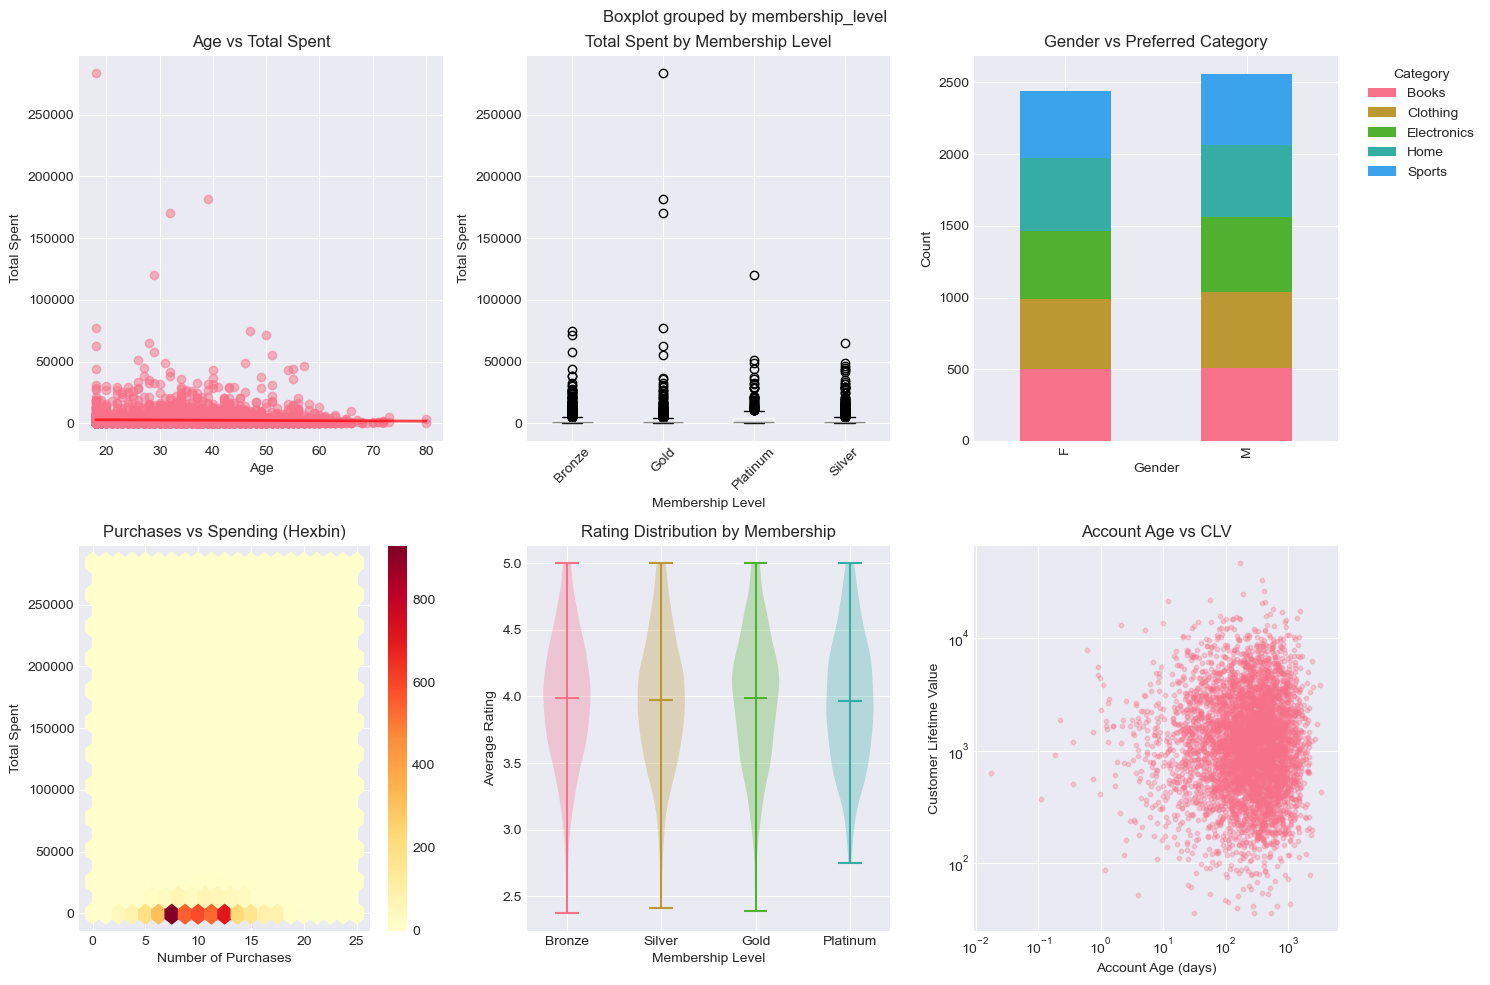


📊 Correlation Analysis:
customer_id vs total_spent: r=-0.022, p=0.1175
customer_id vs num_purchases: r=0.008, p=0.5605
customer_id vs avg_rating: r=0.019, p=0.1721
age vs total_spent: r=-0.026, p=0.0668
age vs num_purchases: r=-0.046, p=0.0012
age vs avg_rating: r=0.016, p=0.2494
account_age_days vs total_spent: r=0.025, p=0.0792
account_age_days vs num_purchases: r=-0.012, p=0.3822
account_age_days vs avg_rating: r=0.013, p=0.3659


In [5]:
# 3.1 Bivariate Relationships
print("🔗 BIVARIATE ANALYSIS\n" + "="*40)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Numeric vs Numeric
ax = axes[0, 0]
ax.scatter(customers['age'], customers['total_spent'], alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Total Spent')
ax.set_title('Age vs Total Spent')
z = np.polyfit(customers['age'], customers['total_spent'], 1)
p = np.poly1d(z)
ax.plot(customers['age'].sort_values(), p(customers['age'].sort_values()), 
        'r-', linewidth=2, alpha=0.7)

# Categorical vs Numeric
ax = axes[0, 1]
customers.boxplot(column='total_spent', by='membership_level', ax=ax)
ax.set_title('Total Spent by Membership Level')
ax.set_xlabel('Membership Level')
ax.set_ylabel('Total Spent')
plt.sca(ax)
plt.xticks(rotation=45)

# Categorical vs Categorical
ax = axes[0, 2]
cross_tab = pd.crosstab(customers['gender'], customers['preferred_category'])
cross_tab.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Gender vs Preferred Category')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hexbin for large datasets
ax = axes[1, 0]
hexbin = ax.hexbin(customers['num_purchases'], customers['total_spent'], 
                    gridsize=20, cmap='YlOrRd')
ax.set_xlabel('Number of Purchases')
ax.set_ylabel('Total Spent')
ax.set_title('Purchases vs Spending (Hexbin)')
plt.colorbar(hexbin, ax=ax)

# Violin plot
ax = axes[1, 1]
membership_order = ['Bronze', 'Silver', 'Gold', 'Platinum']
for i, level in enumerate(membership_order):
    data = customers[customers['membership_level'] == level]['avg_rating']
    parts = ax.violinplot([data.values], positions=[i], showmeans=True)
ax.set_xticks(range(len(membership_order)))
ax.set_xticklabels(membership_order)
ax.set_xlabel('Membership Level')
ax.set_ylabel('Average Rating')
ax.set_title('Rating Distribution by Membership')

# Joint plot equivalent
ax = axes[1, 2]
ax.scatter(customers['account_age_days'], customers['customer_lifetime_value'], 
          alpha=0.3, s=10)
ax.set_xlabel('Account Age (days)')
ax.set_ylabel('Customer Lifetime Value')
ax.set_title('Account Age vs CLV')
ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
plt.show()

# Correlation analysis
print("\n📊 Correlation Analysis:")
numeric_cols = customers.select_dtypes(include=[np.number]).columns
for col1 in numeric_cols[:3]:
    for col2 in numeric_cols[3:6]:
        corr, p_value = stats.pearsonr(customers[col1], customers[col2])
        print(f"{col1} vs {col2}: r={corr:.3f}, p={p_value:.4f}")

---

## 📌 Section 4: Multivariate Analysis

### 🎯 Complex Patterns and Interactions

🔄 MULTIVARIATE ANALYSIS


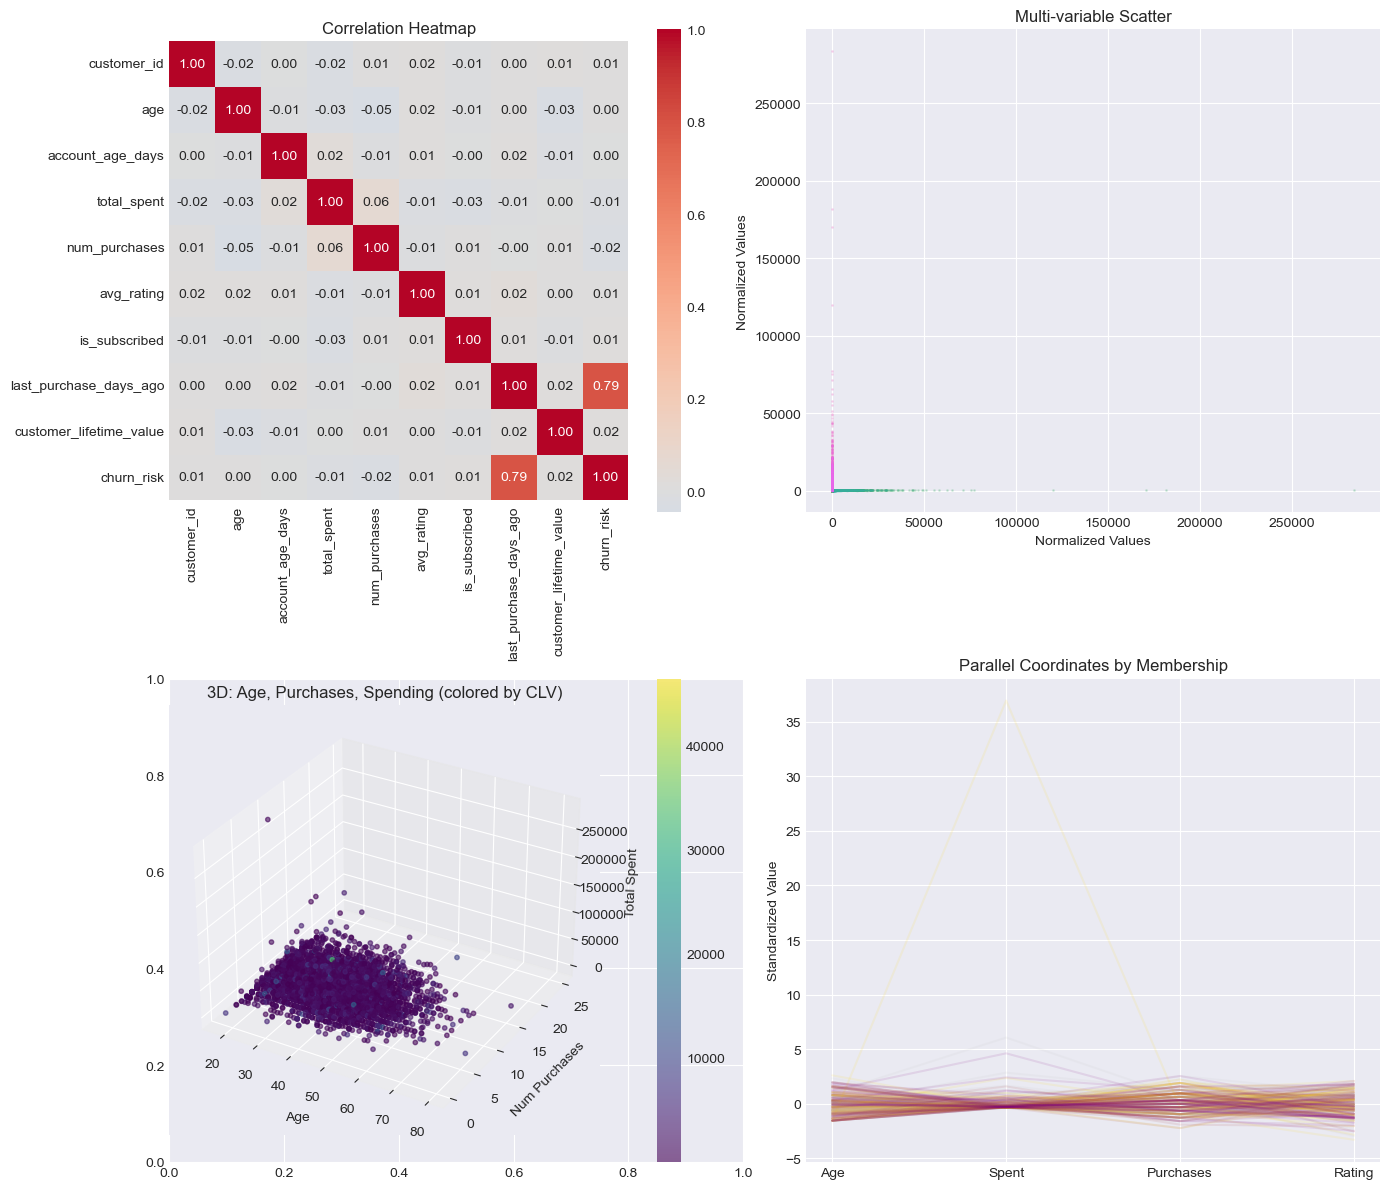


📊 PCA Analysis:
Explained Variance by Component:
PC1: 17.97% (Cumulative: 17.97%)
PC2: 11.01% (Cumulative: 28.99%)
PC3: 10.43% (Cumulative: 39.42%)
PC4: 10.20% (Cumulative: 49.62%)
PC5: 10.14% (Cumulative: 59.76%)


In [6]:
# 4.1 Multivariate Analysis
print("🔄 MULTIVARIATE ANALYSIS\n" + "="*40)

# Correlation heatmap
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Correlation matrix
ax = axes[0, 0]
numeric_data = customers.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=ax, square=True)
ax.set_title('Correlation Heatmap')

# Pair plot alternative (selected variables)
ax = axes[0, 1]
selected_vars = ['age', 'total_spent', 'num_purchases']
for i, var1 in enumerate(selected_vars):
    for j, var2 in enumerate(selected_vars):
        if i != j:
            ax.scatter(customers[var1], customers[var2], 
                      alpha=0.1, s=1, label=f'{var1} vs {var2}')
ax.set_title('Multi-variable Scatter')
ax.set_xlabel('Normalized Values')
ax.set_ylabel('Normalized Values')

# 3D scatter plot
ax = fig.add_subplot(223, projection='3d')
scatter = ax.scatter(customers['age'], 
                     customers['num_purchases'], 
                     customers['total_spent'],
                     c=customers['customer_lifetime_value'],
                     cmap='viridis', s=10, alpha=0.6)
ax.set_xlabel('Age')
ax.set_ylabel('Num Purchases')
ax.set_zlabel('Total Spent')
ax.set_title('3D: Age, Purchases, Spending (colored by CLV)')
plt.colorbar(scatter, ax=ax, pad=0.1)

# Parallel coordinates
ax = axes[1, 1]
# Normalize data for parallel coordinates
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized = scaler.fit_transform(customers[['age', 'total_spent', 'num_purchases', 'avg_rating']])
normalized_df = pd.DataFrame(normalized, columns=['age', 'total_spent', 'num_purchases', 'avg_rating'])
normalized_df['membership'] = customers['membership_level'].values

# Plot lines for each membership level
colors = {'Bronze': 'brown', 'Silver': 'silver', 'Gold': 'gold', 'Platinum': 'purple'}
for level in colors:
    subset = normalized_df[normalized_df['membership'] == level]
    for idx in subset.index[:50]:  # Plot first 50 of each
        ax.plot(range(4), subset.loc[idx, ['age', 'total_spent', 'num_purchases', 'avg_rating']], 
               color=colors[level], alpha=0.1)

ax.set_xticks(range(4))
ax.set_xticklabels(['Age', 'Spent', 'Purchases', 'Rating'])
ax.set_ylabel('Standardized Value')
ax.set_title('Parallel Coordinates by Membership')

plt.tight_layout()
plt.show()

# PCA Analysis
from sklearn.decomposition import PCA

print("\n📊 PCA Analysis:")
pca = PCA()
numeric_scaled = scaler.fit_transform(numeric_data)
pca_result = pca.fit_transform(numeric_scaled)

explained_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(explained_var)

print("Explained Variance by Component:")
for i in range(min(5, len(explained_var))):
    print(f"PC{i+1}: {explained_var[i]*100:.2f}% (Cumulative: {cumsum_var[i]*100:.2f}%)")

---

## 📌 Section 5: Advanced Visualizations

### 🎯 Interactive and Advanced Plots

In [7]:
# 5.1 Interactive Visualizations with Plotly
print("🎨 INTERACTIVE VISUALIZATIONS\n" + "="*40)

# Interactive scatter plot
fig1 = px.scatter(customers, 
                  x='age', 
                  y='total_spent',
                  color='membership_level',
                  size='num_purchases',
                  hover_data=['customer_id', 'city', 'preferred_category'],
                  title='Customer Analysis: Age vs Spending',
                  labels={'total_spent': 'Total Spent ($)',
                         'age': 'Age (years)'},
                  color_discrete_map={'Bronze': 'brown', 
                                      'Silver': 'silver',
                                      'Gold': 'gold',
                                      'Platinum': 'purple'})
fig1.show()

# Sunburst chart
sunburst_data = customers.groupby(['city', 'preferred_category', 'membership_level']).size().reset_index(name='count')
fig2 = px.sunburst(sunburst_data,
                   path=['city', 'preferred_category', 'membership_level'],
                   values='count',
                   title='Customer Distribution Hierarchy')
fig2.show()

# 3D scatter
fig3 = px.scatter_3d(customers.sample(1000),  # Sample for performance
                      x='age',
                      y='total_spent',
                      z='customer_lifetime_value',
                      color='churn_risk',
                      title='3D Customer Analysis',
                      labels={'churn_risk': 'Churn Risk'})
fig3.show()

# Box plot with all points
fig4 = px.box(customers,
              x='membership_level',
              y='total_spent',
              color='gender',
              title='Spending by Membership and Gender',
              points='all',
              hover_data=['customer_id'])
fig4.show()

print("✅ Interactive visualizations created!")
print("💡 Hover over points for details, use controls to zoom/pan")

🎨 INTERACTIVE VISUALIZATIONS


✅ Interactive visualizations created!
💡 Hover over points for details, use controls to zoom/pan


---

## 📌 Section 6: Statistical Analysis

### 🎯 Statistical Tests and Insights

In [8]:
# 6.1 Statistical Tests
print("📊 STATISTICAL ANALYSIS\n" + "="*40)

# T-test: Gender differences in spending
male_spending = customers[customers['gender'] == 'M']['total_spent']
female_spending = customers[customers['gender'] == 'F']['total_spent']
t_stat, p_value = stats.ttest_ind(male_spending, female_spending)

print("T-Test: Gender Differences in Spending")
print(f"Male avg: ${male_spending.mean():.2f}")
print(f"Female avg: ${female_spending.mean():.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"Result: {'Significant' if p_value < 0.05 else 'Not significant'} difference\n")

# ANOVA: Membership levels
membership_groups = [customers[customers['membership_level'] == level]['total_spent'].values 
                    for level in ['Bronze', 'Silver', 'Gold', 'Platinum']]
f_stat, p_value = stats.f_oneway(*membership_groups)

print("ANOVA: Spending Across Membership Levels")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"Result: {'Significant' if p_value < 0.05 else 'Not significant'} difference\n")

# Chi-square test: Gender vs Preferred Category
contingency_table = pd.crosstab(customers['gender'], customers['preferred_category'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square: Gender vs Preferred Category")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"Result: {'Dependent' if p_value < 0.05 else 'Independent'} relationship\n")

# Correlation tests
print("Correlation Tests:")
correlations = [
    ('Age', 'Total Spent', customers['age'], customers['total_spent']),
    ('Num Purchases', 'Total Spent', customers['num_purchases'], customers['total_spent']),
    ('Account Age', 'CLV', customers['account_age_days'], customers['customer_lifetime_value'])
]

for name1, name2, var1, var2 in correlations:
    corr, p_val = stats.pearsonr(var1, var2)
    print(f"{name1} vs {name2}: r={corr:.3f}, p={p_val:.4f}")

📊 STATISTICAL ANALYSIS
T-Test: Gender Differences in Spending
Male avg: $2761.51
Female avg: $2534.21
T-statistic: 1.056
P-value: 0.2910
Result: Not significant difference

ANOVA: Spending Across Membership Levels
F-statistic: 7.503
P-value: 0.0001
Result: Significant difference

Chi-Square: Gender vs Preferred Category
Chi-square statistic: 2.754
P-value: 0.5998
Result: Independent relationship

Correlation Tests:
Age vs Total Spent: r=-0.026, p=0.0668
Num Purchases vs Total Spent: r=0.063, p=0.0000
Account Age vs CLV: r=-0.013, p=0.3405


---

## 📌 Section 7: Segmentation Analysis

### 🎯 Finding Customer Segments

👥 CUSTOMER SEGMENTATION


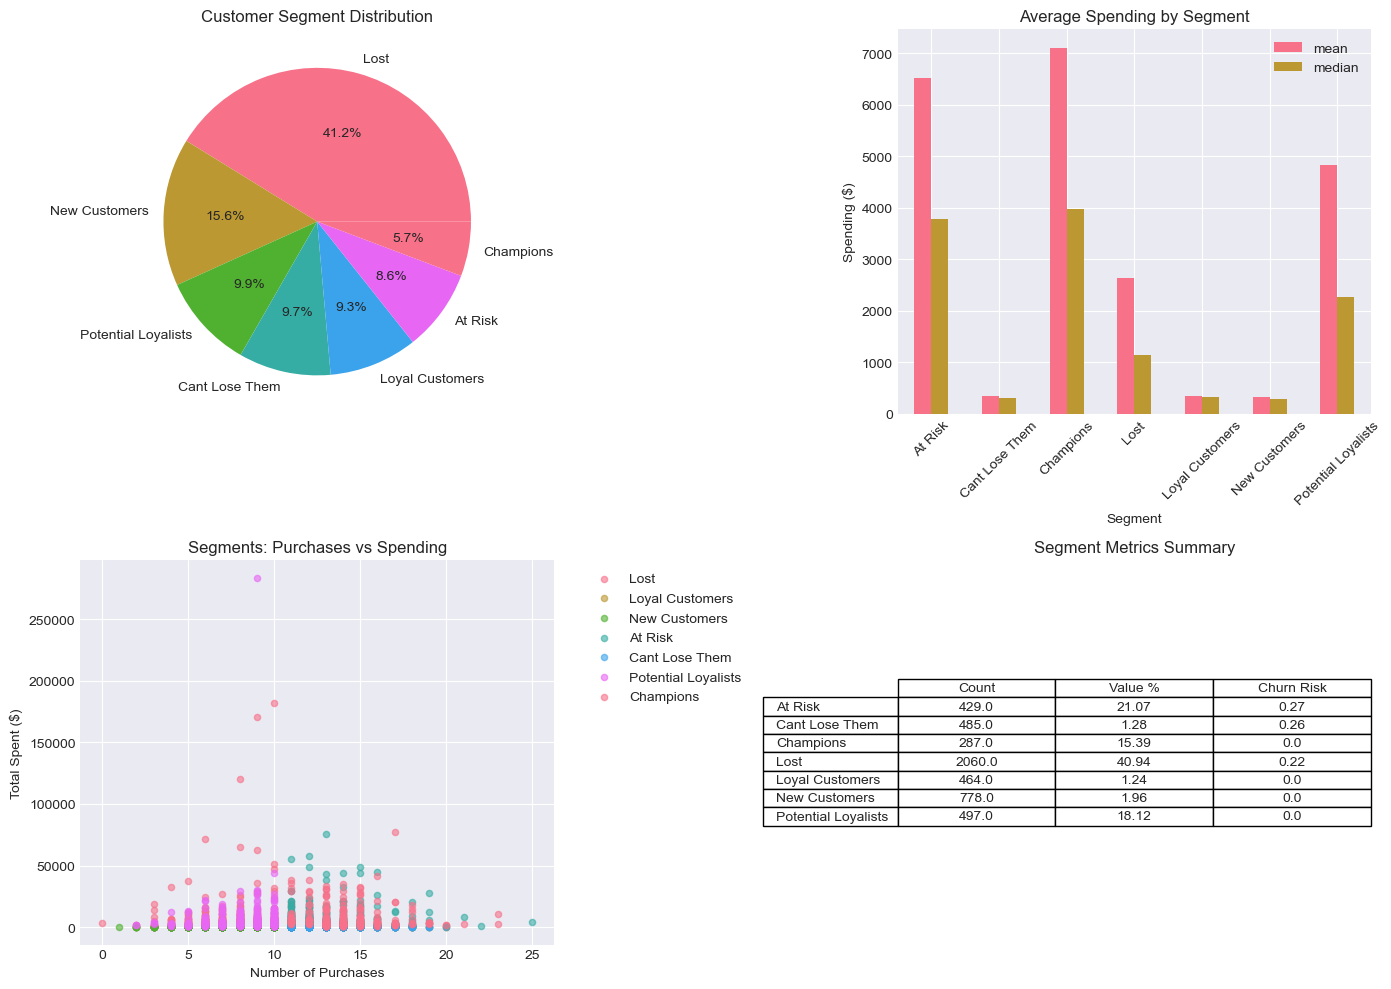


📊 Segment Summary:

Lost:
  Count: 2,060
  Avg Spending: $2633.97
  Churn Risk: 21.8%

New Customers:
  Count: 778
  Avg Spending: $334.43
  Churn Risk: 0.0%

Potential Loyalists:
  Count: 497
  Avg Spending: $4830.74
  Churn Risk: 0.0%

Cant Lose Them:
  Count: 485
  Avg Spending: $351.01
  Churn Risk: 26.0%

Loyal Customers:
  Count: 464
  Avg Spending: $353.55
  Churn Risk: 0.0%


In [9]:
# 7.1 Customer Segmentation
print("👥 CUSTOMER SEGMENTATION\n" + "="*40)

# RFM Analysis
customers['recency_score'] = pd.qcut(customers['last_purchase_days_ago'], 4, 
                                      labels=['4', '3', '2', '1'])  # 4 is best (most recent)
customers['frequency_score'] = pd.qcut(customers['num_purchases'], 4, 
                                       labels=['1', '2', '3', '4'])  # 4 is best (most frequent)
customers['monetary_score'] = pd.qcut(customers['total_spent'], 4, 
                                      labels=['1', '2', '3', '4'])  # 4 is best (highest value)

customers['rfm_score'] = (customers['recency_score'].astype(str) + 
                          customers['frequency_score'].astype(str) + 
                          customers['monetary_score'].astype(str))

# Define segments
def segment_customers(rfm):
    if rfm in ['444', '443', '434', '344']:
        return 'Champions'
    elif rfm in ['442', '441', '432', '431', '342', '341', '332', '331']:
        return 'Loyal Customers'
    elif rfm in ['424', '423', '414', '413', '324', '323']:
        return 'Potential Loyalists'
    elif rfm in ['422', '421', '412', '411', '322', '321', '312', '311']:
        return 'New Customers'
    elif rfm in ['244', '243', '234', '144', '143', '134']:
        return 'At Risk'
    elif rfm in ['242', '241', '232', '231', '142', '141', '132', '131']:
        return 'Cant Lose Them'
    else:
        return 'Lost'

customers['segment'] = customers['rfm_score'].apply(segment_customers)

# Visualize segments
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Segment distribution
ax = axes[0, 0]
segment_counts = customers['segment'].value_counts()
ax.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
ax.set_title('Customer Segment Distribution')

# Segment characteristics
ax = axes[0, 1]
segment_stats = customers.groupby('segment')['total_spent'].agg(['mean', 'median'])
segment_stats.plot(kind='bar', ax=ax)
ax.set_title('Average Spending by Segment')
ax.set_xlabel('Segment')
ax.set_ylabel('Spending ($)')
plt.sca(ax)
plt.xticks(rotation=45)

# Scatter plot colored by segment
ax = axes[1, 0]
for segment in customers['segment'].unique():
    mask = customers['segment'] == segment
    ax.scatter(customers.loc[mask, 'num_purchases'],
              customers.loc[mask, 'total_spent'],
              label=segment, alpha=0.6, s=20)
ax.set_xlabel('Number of Purchases')
ax.set_ylabel('Total Spent ($)')
ax.set_title('Segments: Purchases vs Spending')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Segment metrics
ax = axes[1, 1]
segment_summary = customers.groupby('segment').agg({
    'customer_id': 'count',
    'total_spent': 'sum',
    'churn_risk': 'mean'
}).rename(columns={'customer_id': 'count'})

segment_summary['value_contribution'] = (segment_summary['total_spent'] / 
                                         segment_summary['total_spent'].sum() * 100)

ax.axis('tight')
ax.axis('off')
table_data = segment_summary[['count', 'value_contribution', 'churn_risk']].round(2)
table = ax.table(cellText=table_data.values,
                rowLabels=table_data.index,
                colLabels=['Count', 'Value %', 'Churn Risk'],
                cellLoc='center',
                loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
ax.set_title('Segment Metrics Summary')

plt.tight_layout()
plt.show()

print("\n📊 Segment Summary:")
for segment in segment_counts.index[:5]:
    segment_data = customers[customers['segment'] == segment]
    print(f"\n{segment}:")
    print(f"  Count: {len(segment_data):,}")
    print(f"  Avg Spending: ${segment_data['total_spent'].mean():.2f}")
    print(f"  Churn Risk: {segment_data['churn_risk'].mean()*100:.1f}%")

---

## 📌 Section 8: Time-Based Analysis

### 🎯 Temporal Patterns and Trends

📅 TIME-BASED ANALYSIS


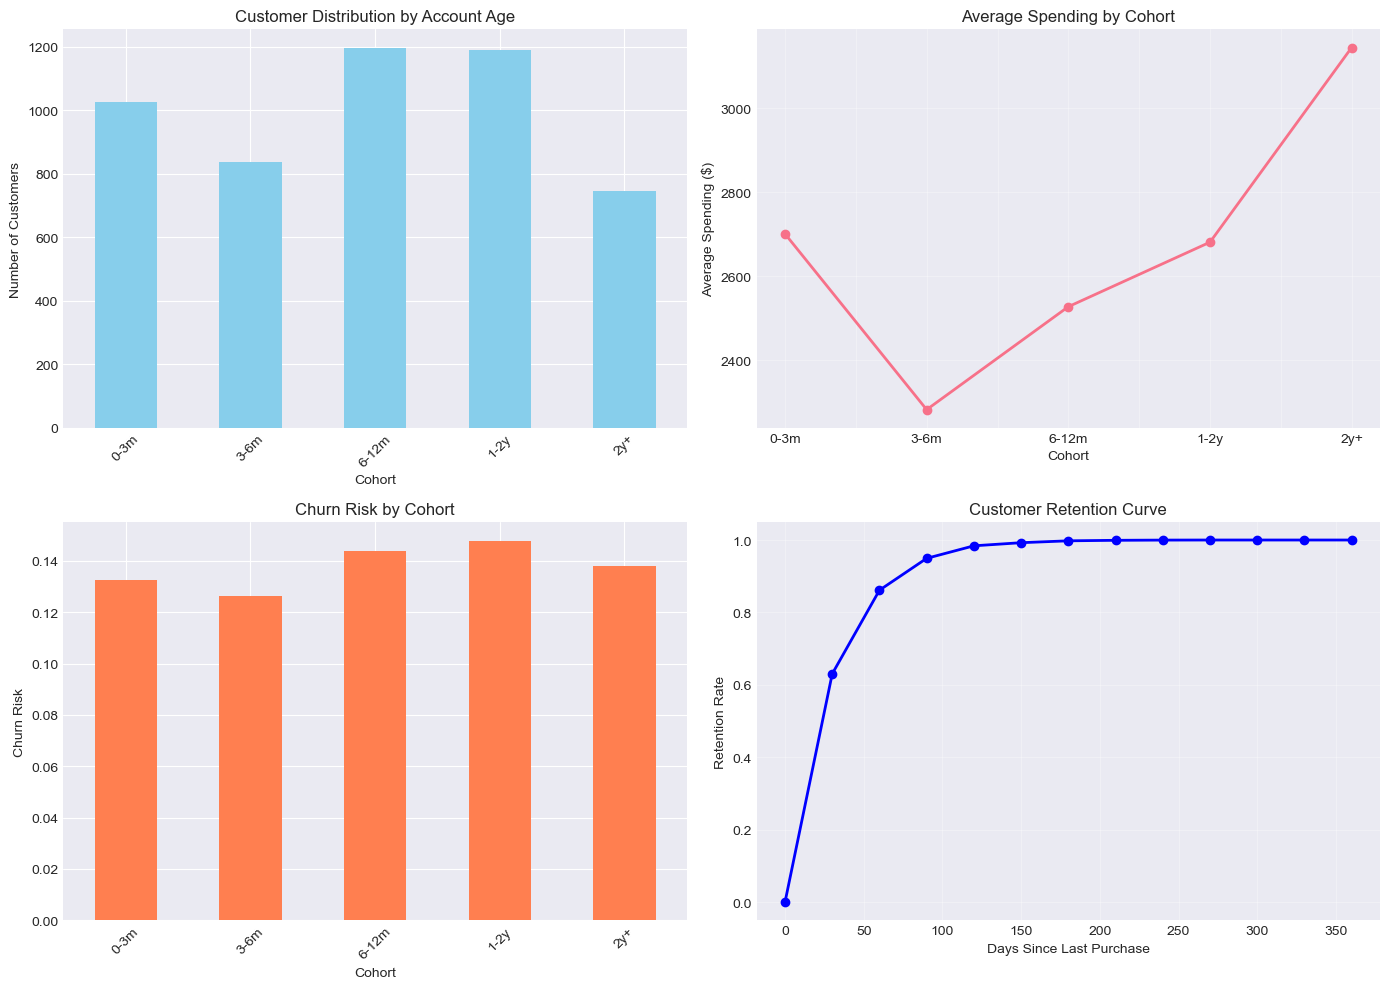


📊 Cohort Analysis Summary:
        count  total_spent  num_purchases  churn_risk  avg_rating
cohort                                                           
0-3m     1027      2700.97           9.91        0.13        3.95
3-6m      838      2282.93          10.09        0.13        4.00
6-12m    1195      2527.77           9.93        0.14        3.99
1-2y     1191      2681.14          10.02        0.15        3.99
2y+       747      3144.02           9.89        0.14        3.97


In [10]:
# 8.1 Time-Based Analysis
print("📅 TIME-BASED ANALYSIS\n" + "="*40)

# Create time-based features
customers['account_age_months'] = customers['account_age_days'] / 30
customers['cohort'] = pd.cut(customers['account_age_months'], 
                             bins=[0, 3, 6, 12, 24, 100],
                             labels=['0-3m', '3-6m', '6-12m', '1-2y', '2y+'])

# Cohort analysis
cohort_stats = customers.groupby('cohort').agg({
    'customer_id': 'count',
    'total_spent': 'mean',
    'num_purchases': 'mean',
    'churn_risk': 'mean',
    'avg_rating': 'mean'
}).rename(columns={'customer_id': 'count'})

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Cohort sizes
ax = axes[0, 0]
cohort_stats['count'].plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Customer Distribution by Account Age')
ax.set_xlabel('Cohort')
ax.set_ylabel('Number of Customers')
plt.sca(ax)
plt.xticks(rotation=45)

# Spending by cohort
ax = axes[0, 1]
cohort_stats['total_spent'].plot(kind='line', marker='o', ax=ax, linewidth=2)
ax.set_title('Average Spending by Cohort')
ax.set_xlabel('Cohort')
ax.set_ylabel('Average Spending ($)')
ax.grid(True, alpha=0.3)

# Churn risk by cohort
ax = axes[1, 0]
cohort_stats['churn_risk'].plot(kind='bar', ax=ax, color='coral')
ax.set_title('Churn Risk by Cohort')
ax.set_xlabel('Cohort')
ax.set_ylabel('Churn Risk')
plt.sca(ax)
plt.xticks(rotation=45)

# Retention curve
ax = axes[1, 1]
retention_data = []
for days in range(0, 365, 30):
    active = (customers['last_purchase_days_ago'] <= days).mean()
    retention_data.append((days, active))

days, retention = zip(*retention_data)
ax.plot(days, retention, 'b-', linewidth=2, marker='o')
ax.set_xlabel('Days Since Last Purchase')
ax.set_ylabel('Retention Rate')
ax.set_title('Customer Retention Curve')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Cohort Analysis Summary:")
print(cohort_stats.round(2).to_string())

---

## 📌 Section 9: Automated EDA Tools

### 🎯 Quick EDA with Libraries

🤖 AUTOMATED EDA TOOLS
📊 Dataset Overview:
Shape: (5000, 21)
Data Types: {dtype('O'): 6, dtype('float64'): 6, dtype('int32'): 4, CategoricalDtype(categories=['1', '2', '3', '4'], ordered=True, categories_dtype=object): 2, dtype('int64'): 1, CategoricalDtype(categories=['4', '3', '2', '1'], ordered=True, categories_dtype=object): 1, CategoricalDtype(categories=['0-3m', '3-6m', '6-12m', '1-2y', '2y+'], ordered=True, categories_dtype=object): 1}
Missing Values: 2
Duplicates: 0

📈 Numeric Variables Summary:
       customer_id      age  account_age_days  total_spent  num_purchases  \
count      5000.00  5000.00           5000.00      5000.00        5000.00   
mean       2500.50    35.03            380.78      2650.54           9.97   
std        1443.52    11.09            381.62      7607.54           3.15   
min           1.00    18.00              0.02         2.73           0.00   
25%        1250.75    27.00            110.90       302.56           8.00   
50%        2500.50    35.00   

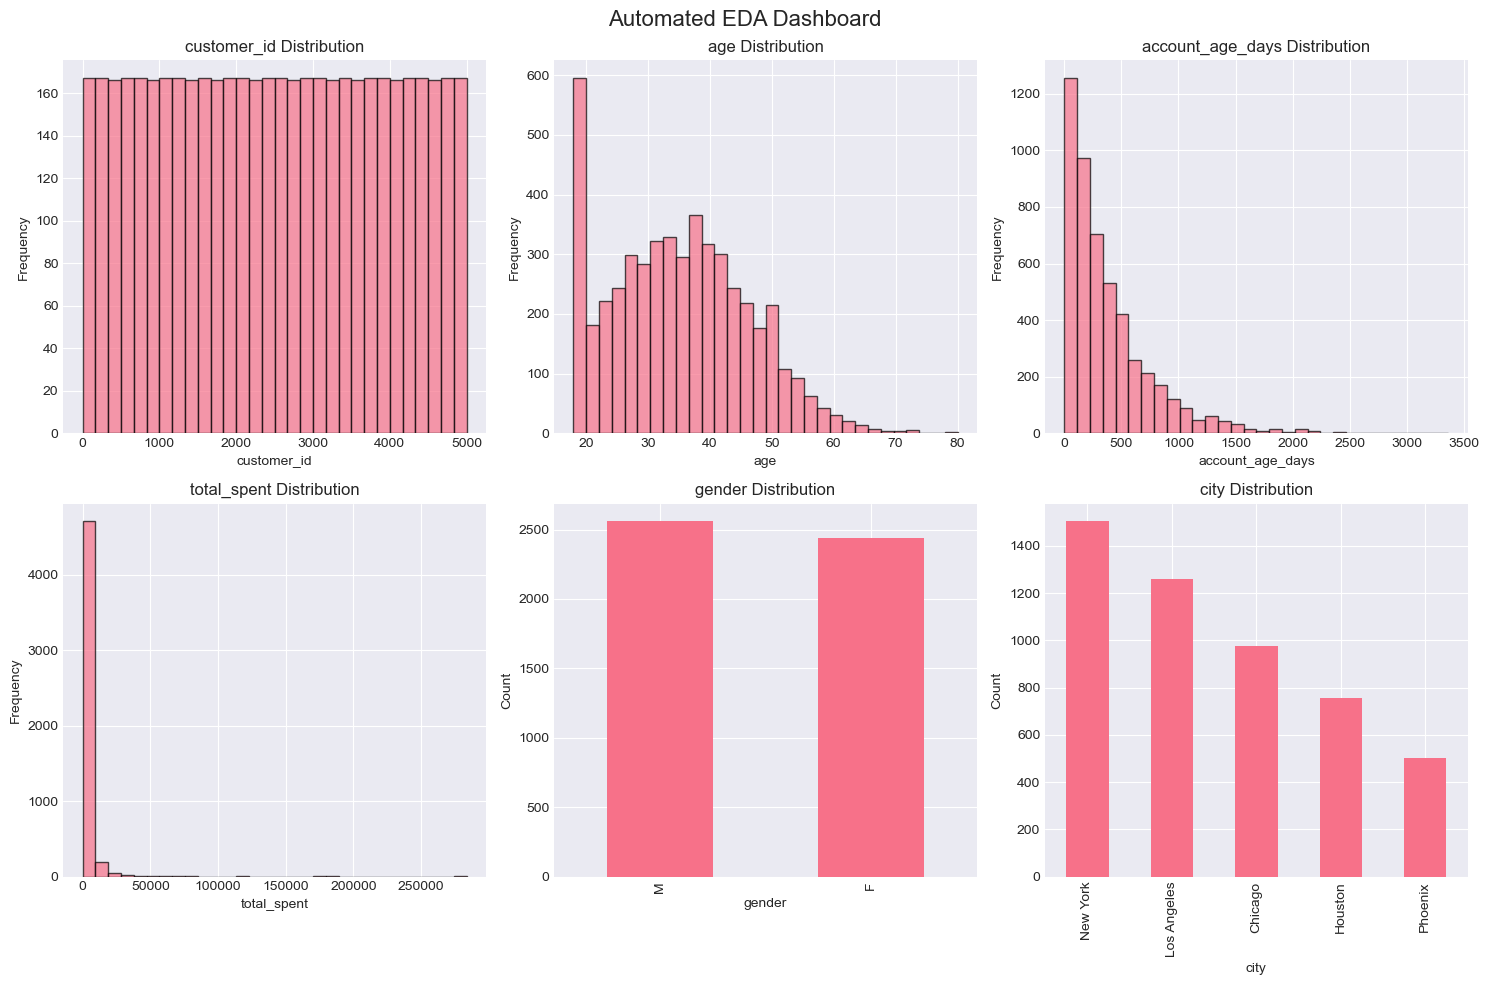


💡 Automated EDA Complete!
For more detailed analysis, consider using:
  • pandas-profiling
  • sweetviz
  • autoviz
  • dtale


In [11]:
# 9.1 Automated EDA
print("🤖 AUTOMATED EDA TOOLS\n" + "="*40)

# Quick statistical summary
def automated_eda_summary(df):
    """Generate comprehensive EDA summary"""
    
    summary = {
        'shape': df.shape,
        'dtypes': df.dtypes.value_counts().to_dict(),
        'missing': df.isnull().sum().sum(),
        'duplicates': df.duplicated().sum(),
        'numeric_cols': len(df.select_dtypes(include=[np.number]).columns),
        'categorical_cols': len(df.select_dtypes(include=['object']).columns)
    }
    
    # Numeric summary
    numeric_summary = df.describe()
    
    # Categorical summary
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_summary = {}
    for col in categorical_cols:
        categorical_summary[col] = {
            'unique': df[col].nunique(),
            'most_common': df[col].mode()[0] if not df[col].mode().empty else None,
            'frequency': df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0
        }
    
    # Correlation insights
    numeric_df = df.select_dtypes(include=[np.number])
    if not numeric_df.empty:
        corr_matrix = numeric_df.corr()
        high_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if abs(corr_matrix.iloc[i, j]) > 0.7:
                    high_corr.append((corr_matrix.columns[i], 
                                    corr_matrix.columns[j], 
                                    corr_matrix.iloc[i, j]))
        summary['high_correlations'] = high_corr
    
    # Outlier detection
    outliers = {}
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = ((numeric_df[col] < Q1 - 1.5*IQR) | 
                        (numeric_df[col] > Q3 + 1.5*IQR)).sum()
        if outlier_count > 0:
            outliers[col] = outlier_count
    summary['outliers'] = outliers
    
    return summary, numeric_summary, categorical_summary

# Run automated EDA
summary, numeric_summary, categorical_summary = automated_eda_summary(customers)

print("📊 Dataset Overview:")
print(f"Shape: {summary['shape']}")
print(f"Data Types: {summary['dtypes']}")
print(f"Missing Values: {summary['missing']}")
print(f"Duplicates: {summary['duplicates']}")

print("\n📈 Numeric Variables Summary:")
print(numeric_summary.round(2))

print("\n📊 Categorical Variables:")
for col, stats in categorical_summary.items():
    print(f"{col}: {stats['unique']} unique, most common: {stats['most_common']}")

print("\n🔗 High Correlations (|r| > 0.7):")
for var1, var2, corr in summary.get('high_correlations', []):
    print(f"{var1} ↔ {var2}: {corr:.3f}")

print("\n🔍 Outliers Detected:")
for col, count in summary.get('outliers', {}).items():
    print(f"{col}: {count} outliers")

# Quick visualization dashboard
def create_eda_dashboard(df):
    """Create automated visualization dashboard"""
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns[:4]
    categorical_cols = df.select_dtypes(include=['object']).columns[:2]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    # Numeric distributions
    for i, col in enumerate(numeric_cols):
        axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    # Categorical distributions
    for i, col in enumerate(categorical_cols):
        df[col].value_counts()[:10].plot(kind='bar', ax=axes[4+i])
        axes[4+i].set_title(f'{col} Distribution')
        axes[4+i].set_xlabel(col)
        axes[4+i].set_ylabel('Count')
    
    plt.suptitle('Automated EDA Dashboard', fontsize=16)
    plt.tight_layout()
    plt.show()

create_eda_dashboard(customers)

print("\n💡 Automated EDA Complete!")
print("For more detailed analysis, consider using:")
print("  • pandas-profiling")
print("  • sweetviz")
print("  • autoviz")
print("  • dtale")

---

## 🎯 Section 10: Business Insights & Recommendations

### Translating Analysis to Action

💼 BUSINESS INSIGHTS & RECOMMENDATIONS
📊 KEY BUSINESS METRICS:
Total Revenue: $13,252,707.75
Average CLV: $1,816.81
Churn Rate: 13.9%
Customer Base: 5,000

🎯 KEY INSIGHTS:
1. Revenue Concentration: Top 20% of customers generate 75.0% of revenue
2. Best Segment: 'Champions' has highest average spending
3. Churn Risk: 12.4% of revenue is at risk
4. Top Category: 'Books' generates most revenue
5. Membership Value: Platinum members spend 75% more than Bronze

💡 RECOMMENDATIONS:
1. RETENTION: Launch targeted retention campaign for high-value at-risk customers
2. UPSELL: Create upgrade path from Bronze → Silver → Gold → Platinum
3. FOCUS: Prioritize marketing for 'Books' category
4. SEGMENTATION: Develop personalized strategies for each customer segment
5. LOYALTY: Implement rewards program to increase purchase frequency


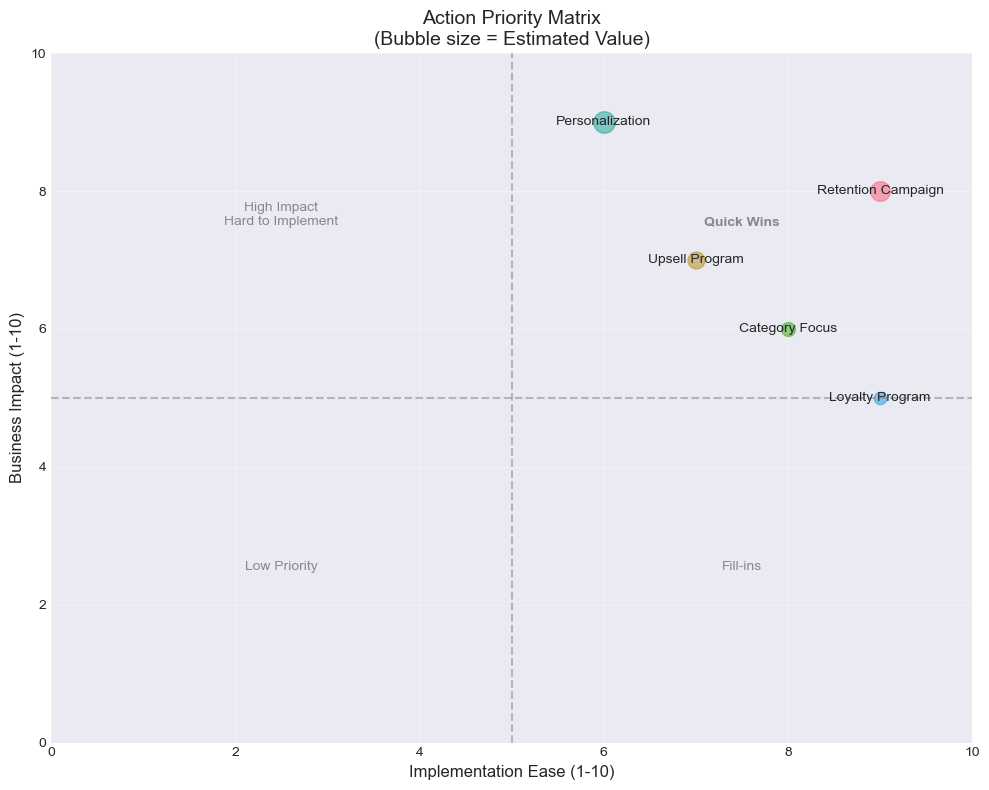


✅ EDA COMPLETE - Ready for modeling and implementation!


In [12]:
# 10.1 Business Insights Generation
print("💼 BUSINESS INSIGHTS & RECOMMENDATIONS\n" + "="*50)

# Key metrics calculation
total_revenue = customers['total_spent'].sum()
avg_customer_value = customers['customer_lifetime_value'].mean()
churn_rate = customers['churn_risk'].mean()
top_segment_revenue = customers.groupby('segment')['total_spent'].sum().max()

print("📊 KEY BUSINESS METRICS:")
print("=" * 40)
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average CLV: ${avg_customer_value:,.2f}")
print(f"Churn Rate: {churn_rate*100:.1f}%")
print(f"Customer Base: {len(customers):,}")

print("\n🎯 KEY INSIGHTS:")
print("=" * 40)

# Insight 1: Revenue concentration
top_20_pct = int(len(customers) * 0.2)
top_20_revenue = customers.nlargest(top_20_pct, 'total_spent')['total_spent'].sum()
revenue_concentration = top_20_revenue / total_revenue * 100
print(f"1. Revenue Concentration: Top 20% of customers generate {revenue_concentration:.1f}% of revenue")

# Insight 2: Segment performance
best_segment = customers.groupby('segment')['total_spent'].mean().idxmax()
print(f"2. Best Segment: '{best_segment}' has highest average spending")

# Insight 3: Churn patterns
high_risk_value = customers[customers['churn_risk'] == 1]['total_spent'].sum()
at_risk_pct = high_risk_value / total_revenue * 100
print(f"3. Churn Risk: {at_risk_pct:.1f}% of revenue is at risk")

# Insight 4: Category preferences
top_category = customers.groupby('preferred_category')['total_spent'].sum().idxmax()
print(f"4. Top Category: '{top_category}' generates most revenue")

# Insight 5: Membership impact
platinum_avg = customers[customers['membership_level'] == 'Platinum']['total_spent'].mean()
bronze_avg = customers[customers['membership_level'] == 'Bronze']['total_spent'].mean()
membership_lift = (platinum_avg / bronze_avg - 1) * 100
print(f"5. Membership Value: Platinum members spend {membership_lift:.0f}% more than Bronze")

print("\n💡 RECOMMENDATIONS:")
print("=" * 40)
recommendations = [
    "1. RETENTION: Launch targeted retention campaign for high-value at-risk customers",
    "2. UPSELL: Create upgrade path from Bronze → Silver → Gold → Platinum",
    f"3. FOCUS: Prioritize marketing for '{top_category}' category",
    "4. SEGMENTATION: Develop personalized strategies for each customer segment",
    "5. LOYALTY: Implement rewards program to increase purchase frequency"
]

for rec in recommendations:
    print(rec)

# Action priority matrix
fig, ax = plt.subplots(figsize=(10, 8))

actions = [
    ('Retention Campaign', 8, 9, 1000000),
    ('Upsell Program', 7, 7, 750000),
    ('Category Focus', 6, 8, 500000),
    ('Personalization', 9, 6, 1200000),
    ('Loyalty Program', 5, 9, 400000)
]

for action, impact, ease, value in actions:
    ax.scatter(ease, impact, s=value/5000, alpha=0.6)
    ax.annotate(action, (ease, impact), ha='center', va='center')

ax.set_xlabel('Implementation Ease (1-10)', fontsize=12)
ax.set_ylabel('Business Impact (1-10)', fontsize=12)
ax.set_title('Action Priority Matrix\n(Bubble size = Estimated Value)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Add quadrant lines
ax.axhline(y=5, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=5, color='gray', linestyle='--', alpha=0.5)

# Add quadrant labels
ax.text(2.5, 7.5, 'High Impact\nHard to Implement', ha='center', alpha=0.5)
ax.text(7.5, 7.5, 'Quick Wins', ha='center', alpha=0.5, fontweight='bold')
ax.text(2.5, 2.5, 'Low Priority', ha='center', alpha=0.5)
ax.text(7.5, 2.5, 'Fill-ins', ha='center', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n✅ EDA COMPLETE - Ready for modeling and implementation!")

---

## 🎯 Summary & Next Steps

### 🏆 What You've Learned:

✅ **EDA Framework**
- Systematic exploration approach
- Question-driven analysis
- Comprehensive assessment

✅ **Analysis Techniques**
- Univariate analysis
- Bivariate relationships
- Multivariate patterns
- Segmentation

✅ **Visualization Mastery**
- Static visualizations
- Interactive plots
- Dashboard creation
- Business presentations

✅ **Statistical Insights**
- Hypothesis testing
- Correlation analysis
- Distribution assessment
- Outlier detection

✅ **Business Value**
- Translating data to insights
- Actionable recommendations
- Priority matrices
- ROI estimation

### 🚀 Next Steps:

1. **Practice on Real Data** - Apply to your projects
2. **Master Pipeline Creation** - Next notebook!
3. **Learn Feature Engineering** - Create powerful features
4. **Study Machine Learning** - Build predictive models

### 💡 Key Takeaways:

- **EDA is iterative** - Keep asking questions
- **Visualize everything** - Pictures reveal patterns
- **Context matters** - Understand the business
- **Document findings** - Share insights clearly

---

## 🎉 Congratulations!

You now have a complete EDA framework!

Remember: **Great analysis leads to great decisions.**

**Keep exploring, keep discovering, keep innovating!** 🚀

In [13]:
# 🎊 Chapter Complete!
print("🎊" * 20)
print("\n    🏆 EXPLORATORY DATA ANALYSIS COMPLETE! 🏆")
print("\n    You've mastered:")
print("    ✅ EDA Framework")
print("    ✅ Statistical Analysis")
print("    ✅ Advanced Visualizations")
print("    ✅ Segmentation")
print("    ✅ Business Insights")
print("\n    Ready for: Master Pipeline Creation!")
print("\n" + "🎊" * 20)

🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊

    🏆 EXPLORATORY DATA ANALYSIS COMPLETE! 🏆

    You've mastered:
    ✅ EDA Framework
    ✅ Statistical Analysis
    ✅ Advanced Visualizations
    ✅ Segmentation
    ✅ Business Insights

    Ready for: Master Pipeline Creation!

🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊
